# Lab 4 - Part 1: Core NLP Tasks

**Course:** Natural Language Processing


**Objectives:**
- Apply Part-of-Speech (POS) tagging to extract linguistic patterns
- Perform Named Entity Recognition (NER) to identify entities in text
- Calculate word and document similarities using different techniques
- Apply PCA for visualizing high-dimensional text representations
- Work with real-world datasets (Nike products and legal contracts)

---

## Instructions

1. Complete all exercises marked with `# YOUR CODE HERE`
2. **Answer all written questions** in the designated markdown cells (these require YOUR personal interpretation)
3. Save your completed notebook
4. **Push to your Git repository and send the link to: yoroba93@gmail.com**

### Important: Personal Interpretation Questions

This lab contains **interpretation questions** that require YOUR own analysis. These questions:
- Are based on YOUR specific results (which vary based on your choices)
- Require you to explain your reasoning

---

## Setup

In [ ]:
# Install required libraries (uncomment if needed)
# !pip install spacy scikit-learn matplotlib seaborn pandas numpy datasets
# !python -m spacy download en_core_web_sm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
import warnings
warnings.filterwarnings('ignore')

# NLP libraries
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

print("Setup complete!")
print(f"spaCy version: {spacy.__version__}")

Setup complete!
spaCy version: 3.8.11


---

## Part A: Loading Nike Products Dataset

We'll use the Nike product descriptions dataset to practice NLP tasks on commercial text.

In [4]:
# Load Nike products dataset
# NOTE: Place the 'NikeProductDescriptions.csv' file in your working directory
nike_df = pd.read_csv('NikeProductDescriptions.csv')

print(f"Dataset shape: {nike_df.shape}")
print(f"\nColumns: {nike_df.columns.tolist()}")
print(f"\nFirst 3 products:")
nike_df.head(3)

Dataset shape: (400, 3)

Columns: ['Title', 'Subtitle', 'Product Description']

First 3 products:


,Title,Subtitle,Product Description
0,Nike Air Force 1 '07,Men's Shoes,It doesn't get more legendary than this. Desig...
1,Nike Air Max Dawn SE,Men's Shoes,Find out what moves you with the Air Max Dawn....
2,Nike SB Dunk Low Pro Premium,Skate Shoes,Pack your style—on your feet. Bringing a fresh...


In [5]:
# Display a sample product
sample_idx = 0
print("Sample Product:")
print("=" * 60)
print(f"Title: {nike_df.iloc[sample_idx]['Title']}")
print(f"Subtitle: {nike_df.iloc[sample_idx]['Subtitle']}")
print(f"\nDescription:\n{nike_df.iloc[sample_idx]['Product Description']}")

Sample Product:
Title: Nike Air Force 1 '07
Subtitle: Men's Shoes

Description:
It doesn't get more legendary than this. Designed to turn heads, the Nike Air Force 1 '07 crosses hardwood comfort with off-court flair. Its crisp leather upper looks sleek and fresh, while lustrous Swoosh logos give off an almost iridescent look to add the perfect amount of flash to make you shine. Consider them a slam dunk.


---

## Part B: Part-of-Speech (POS) Tagging

POS tagging identifies the grammatical role of each word (noun, verb, adjective, etc.).

In [6]:
# Example: POS tagging with spaCy
sample_text = "Nike Air Force 1 shoes provide incredible comfort and stylish design for athletes."
doc = nlp(sample_text)

print("POS Tagging Example:")
print("=" * 60)
for token in doc:
    print(f"{token.text:15} | POS: {token.pos_:10} | Tag: {token.tag_:8} | Lemma: {token.lemma_}")

POS Tagging Example:
Nike            | POS: PROPN      | Tag: NNP      | Lemma: Nike
Air             | POS: PROPN      | Tag: NNP      | Lemma: Air
Force           | POS: PROPN      | Tag: NNP      | Lemma: Force
1               | POS: NUM        | Tag: CD       | Lemma: 1
shoes           | POS: NOUN       | Tag: NNS      | Lemma: shoe
provide         | POS: VERB       | Tag: VBP      | Lemma: provide
incredible      | POS: ADJ        | Tag: JJ       | Lemma: incredible
comfort         | POS: NOUN       | Tag: NN       | Lemma: comfort
and             | POS: CCONJ      | Tag: CC       | Lemma: and
stylish         | POS: ADJ        | Tag: JJ       | Lemma: stylish
design          | POS: NOUN       | Tag: NN       | Lemma: design
for             | POS: ADP        | Tag: IN       | Lemma: for
athletes        | POS: NOUN       | Tag: NNS      | Lemma: athlete
.               | POS: PUNCT      | Tag: .        | Lemma: .


### Exercise B.1: Analyze POS Distribution in Nike Products

Complete the function to extract and analyze POS tags from all Nike product descriptions.

In [7]:
def analyze_pos_distribution(texts):
    """
    Analyze the distribution of POS tags in a list of texts.

    Args:
        texts (list): List of text strings

    Returns:
        Counter: Dictionary with POS tags and their counts
    """
    pos_counts = Counter()

    # YOUR CODE HERE
    # 1. For each text, process it with nlp(text)
    # 2. For each token in the doc, count its POS tag (token.pos_)
    # 3. Return the counter
    pos_counts = Counter()

    for text in texts:
        doc = nlp(text)
        for token in doc:
            pos_counts[token.pos_] += 1  # Count POS tag


    return pos_counts

# Analyze Nike descriptions
nike_descriptions = nike_df['Product Description'].dropna().tolist()
pos_distribution = analyze_pos_distribution(nike_descriptions)

print("POS Tag Distribution:")
print("=" * 40)
for pos, count in pos_distribution.most_common(15):
    print(f"{pos:10}: {count:5} ({count/sum(pos_distribution.values())*100:.2f}%)")

POS Tag Distribution:
NOUN      :  4620 (20.72%)
VERB      :  2786 (12.49%)
PUNCT     :  2694 (12.08%)
ADJ       :  2164 (9.70%)
ADP       :  2152 (9.65%)
DET       :  1943 (8.71%)
PRON      :  1711 (7.67%)
PROPN     :  1221 (5.47%)
CCONJ     :   741 (3.32%)
AUX       :   661 (2.96%)
ADV       :   641 (2.87%)
PART      :   401 (1.80%)
SCONJ     :   336 (1.51%)
NUM       :   211 (0.95%)
INTJ      :    16 (0.07%)


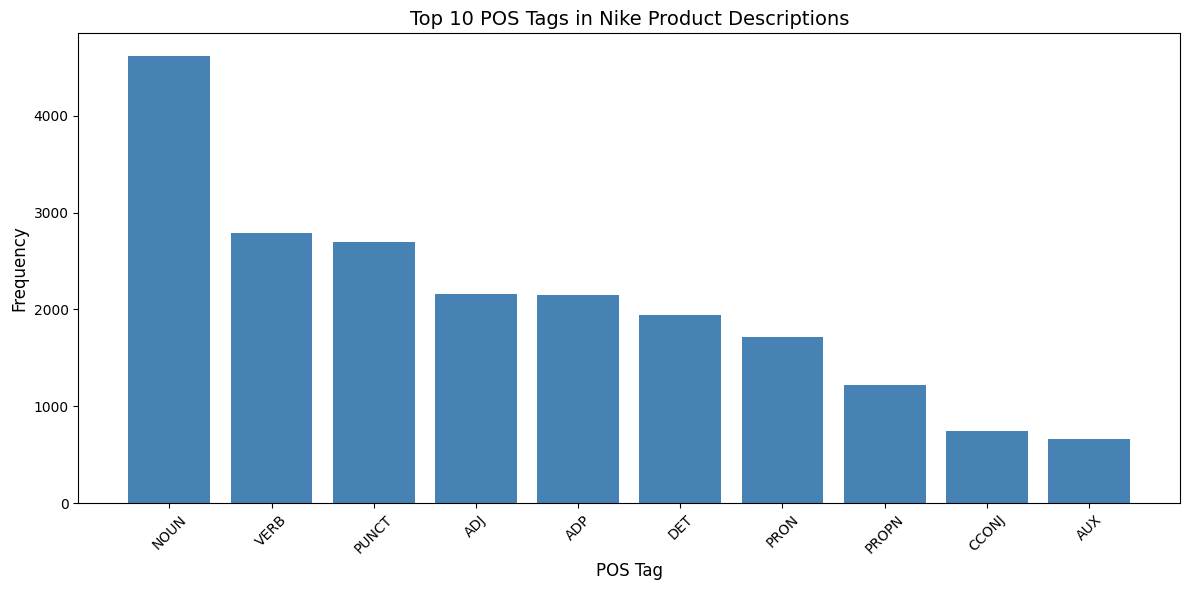

In [8]:
# Visualize POS distribution
top_pos = dict(pos_distribution.most_common(10))

plt.figure(figsize=(12, 6))
plt.bar(top_pos.keys(), top_pos.values(), color='steelblue')
plt.xlabel('POS Tag', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 10 POS Tags in Nike Product Descriptions', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pos_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

### Exercise B.2: Extract Adjectives and Verbs

Marketing copy often uses powerful adjectives and action verbs. Extract the most common ones.

In [9]:
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")

def extract_pos_words(texts, pos_tag, top_n=20):
    """
    Extract words with a specific POS tag.

    Args:
        texts (list): List of text strings
        pos_tag (str): POS tag to extract (e.g., 'ADJ', 'VERB')
        top_n (int): Number of top words to return

    Returns:
        Counter: Most common words with the specified POS tag
    """
    words = []

    # YOUR CODE HERE
    # 1. Process each text with spaCy
    # 2. Extract tokens where token.pos_ == pos_tag
    # 3. Use lemmatized form (token.lemma_.lower())
    # 4. Filter out stopwords and short words (len < 3)
    # 5. Return Counter with top_n most common

    #return ""
    words = []

    for text in texts:
        doc = nlp(text)
        for token in doc:
            # Check POS tag, not a stopword, and length >= 3
            if token.pos_ == pos_tag and token.lemma_.lower() not in STOP_WORDS and len(token.lemma_) >= 3:
                words.append(token.lemma_.lower())

    return Counter(words).most_common(top_n)


# Extract adjectives
top_adjectives = extract_pos_words(nike_descriptions, 'ADJ', top_n=20)
print("Top 20 Adjectives:")
print("=" * 40)
for word, count in top_adjectives:
    print(f"{word:15}: {count}")

print("\n" + "=" * 40)

# Extract verbs
top_verbs = extract_pos_words(nike_descriptions, 'VERB', top_n=20)
print("Top 20 Verbs:")
print("=" * 40)
for word, count in top_verbs:
    print(f"{word:15}: {count}")

Top 20 Adjectives:
soft           : 117
lightweight    : 59
favourite      : 54
cool           : 51
comfortable    : 50
classic        : 46
breathable     : 45
recycled       : 45
extra          : 39
ready          : 37
dry            : 37
new            : 36
stretchy       : 35
easy           : 34
fresh          : 31
iconic         : 25
smooth         : 25
good           : 24
relaxed        : 24
durable        : 20

Top 20 Verbs:
help           : 114
feel           : 72
add            : 62
wicke          : 61
let            : 58
stay           : 53
inspire        : 49
wear           : 41
play           : 38
bring          : 36
need           : 33
design         : 31
look           : 31
love           : 31
pair           : 25
run            : 25
come           : 24
find           : 23
know           : 23
celebrate      : 21


### Written Question B.1 (Personal Interpretation)

Analyze the linguistic patterns in Nike's marketing copy:

1. **What do the most common adjectives reveal about Nike's brand messaging?** (List at least 3 adjectives and explain what they convey)
2. **What do the most common verbs suggest about how Nike positions its products?** (List at least 3 verbs and their implications)
3. **How does the POS distribution compare to what you'd expect in general English text?** (Consider the ratio of nouns/verbs/adjectives)

**YOUR ANSWER:**

1. Key adjectives and brand messaging:
   - Soft – conveys comfort and emphasizes that Nike products are easy and pleasant to wear.
   - Lightweight – highlights performance and mobility, suggesting that the products won’t slow you down during athletic activity.
   - Comfortable – reinforces the user-centric, everyday usability aspect, showing that Nike products are designed for both sports and casual wear.
   
   Other adjectives like breathable, durable, and classic emphasize innovation, longevity, and timeless style—reinforcing Nike’s image as a high-quality, functional, and stylish brand.

2. Key verbs and product positioning:
   - Help – positions the product as supportive, helping users achieve goals (fitness, comfort, or style).

   - Feel – emphasizes experience and emotion, making the customer focus on personal sensations like comfort or confidence.
  
   - Wear – directly encourages action, inviting the consumer to use the product in daily life or sports.

3. POS distribution comparison:
   - Nike product descriptions have a higher proportion of adjectives and verbs compared to general English text.

   - This makes sense because marketing copy aims to describe products vividly (adjectives) and encourage action or engagement (verbs).

   - General English text usually has a higher proportion of nouns, but here, nouns are less prominent—showing the copy focuses on experience, benefits, and action, rather than just objects.

---

## Part C: Named Entity Recognition (NER)

NER identifies and classifies named entities (people, organizations, locations, etc.) in text.

In [10]:
# Example: NER with spaCy
sample_text = "Nike launched Air Jordan in 1984 in Chicago. Michael Jordan wore them throughout his NBA career."
doc = nlp(sample_text)

print("Named Entity Recognition Example:")
print("=" * 60)
for ent in doc.ents:
    print(f"{ent.text:20} | Type: {ent.label_:15} | Description: {spacy.explain(ent.label_)}")

Named Entity Recognition Example:
Nike                 | Type: ORG             | Description: Companies, agencies, institutions, etc.
Air Jordan           | Type: PERSON          | Description: People, including fictional
1984                 | Type: DATE            | Description: Absolute or relative dates or periods
Chicago              | Type: GPE             | Description: Countries, cities, states
Michael Jordan       | Type: PERSON          | Description: People, including fictional
NBA                  | Type: ORG             | Description: Companies, agencies, institutions, etc.


### Exercise C.1: Load Legal Contracts Dataset

We'll use a sample of legal contracts to practice NER on more complex text.

In [11]:
import requests
import pandas as pd

print("Loading legal contracts via Hugging Face API...")

# 1. Use the URL you provided to fetch the data directly
url = "https://datasets-server.huggingface.co/rows?dataset=albertvillanova%2Flegal_contracts&config=default&split=train&offset=0&length=100"

try:
    response = requests.get(url)
    response.raise_for_status()  # Check for errors
    data_json = response.json()

    # 2. Extract the actual row data from the JSON response
    # The API returns a structure like: {'rows': [{'row': {'text': ...}}, ...]}
    rows = [item['row'] for item in data_json['rows']]

    # 3. Convert to DataFrame
    contracts_df = pd.DataFrame(rows)

    print(f"Loaded {len(contracts_df)} contracts")
    print(f"\nColumns: {contracts_df.columns.tolist()}")
    print(f"\nFirst contract preview (first 500 chars):")
    # Accessing the text column safely
    sample_text = contracts_df.iloc[0]['text'] if 'text' in contracts_df.columns else str(contracts_df.iloc[0])
    print(sample_text[:500] + "...")

except Exception as e:
    print(f"Error fetching data: {e}")

Loading legal contracts via Hugging Face API...
Loaded 100 contracts

Columns: ['text']

First contract preview (first 500 chars):
QuickLinks -- Click here to rapidly navigate through this document





AMENDED AND RESTATED
EMPLOYMENT AND NONCOMPETITION AGREEMENT

    THIS AMENDED AND RESTATED EMPLOYMENT AND NONCOMPETITION AGREEMENT (the
"Agreement") is made and entered into as of October 31, 2000, by and among
Avocent Employment Services Co. (formerly known as Polycon Investments, Inc.), a
Texas corporation ("Employer"), Avocent Corporation, a Delaware corporation, and
R. Byron Driver (the "Employee").


RECITALS

    WHER...


In [1]:
from datasets import load_dataset

# Load a small sample of legal contracts (this dataset is very large!)
# WARNING: Do NOT try to load the entire dataset - it will crash!
#print("Loading legal contracts dataset (sample only)...")

# YOUR CODE HERE
# Load only 50 examples from the 'train' split
# Use: load_dataset("albertvillanova/legal_contracts", split="train[:50]")
#contracts_dataset = None  # Replace with your code

# Load only 50 examples from the 'train' split
#print("Loading legal contracts dataset (sample only)...")
#contracts_dataset = load_dataset("albertvillanova/legal_contracts", split="train[:50]")

# Load English contracts split from the Multi_Legal_Pile dataset
#contracts_dataset = load_dataset(
#    "joelniklaus/Multi_Legal_Pile_Commercial",
#    "en_contracts",
#    split="train"
#)
# Convert to DataFrame
#contracts_df = pd.DataFrame(contracts_dataset)

#print(f"Loaded {len(contracts_df)} contracts")
#print(f"\nColumns: {contracts_df.columns.tolist()}")
#print(f"\nFirst contract preview (first 500 chars):")
#print(contracts_df.iloc[0]['text'][:500] + "...")

### Exercise C.2: Extract and Analyze Named Entities

Complete the function to extract entities from the legal contracts.

In [12]:
def extract_entities(texts, entity_types=None):
    """
    Extract named entities from texts.

    Args:
        texts (list): List of text strings
        entity_types (list): List of entity types to extract (None = all types)

    Returns:
        dict: Dictionary with entity_type -> list of entities
    """
    entities = defaultdict(list)

    # YOUR CODE HERE
    # 1. Process each text with spaCy
    # 2. For each entity (doc.ents):
    #    - If entity_types is None or entity.label_ in entity_types
    #    - Add entity.text to entities[entity.label_]
    # 3. Return entities dict
    entities = defaultdict(list)

    for text in texts:
        doc = nlp(text)
        for ent in doc.ents:
            if entity_types is None or ent.label_ in entity_types:
                entities[ent.label_].append(ent.text)

    return entities

# Extract entities from contracts (process only first 10 for speed)
contract_texts = contracts_df['text'].head(10).tolist()
contract_entities = extract_entities(contract_texts)

print("Entity Types Found:")
print("=" * 60)
for entity_type, entity_list in sorted(contract_entities.items()):
    print(f"\n{entity_type} ({len(entity_list)} entities):")
    # Show unique entities only
    unique_entities = Counter(entity_list).most_common(10)
    for entity, count in unique_entities:
        print(f"  {entity}: {count}")

Entity Types Found:

CARDINAL (1540 entities):
  2: 34
  one: 30
  1: 25
  3: 23
  two: 17
  12: 17
  6: 14
  5: 14
  10: 13
  19: 13

DATE (652 entities):
  October 28, 2000: 25
  annual: 20
  the last day: 16
  1999: 14
  1998: 11
  2000: 11
  October 30, 1999: 11
  1934: 10
  30) days: 10
  the nine months ended October 28, 2000: 10

EVENT (27 entities):
  Plan: 13
  this Sixth Amendment: 3
  Business Day: 3
  Regulation 14A: 2
  the "Accounting Firm: 1
  THIS SIXTH AMENDMENT TO THIRD AMENDED: 1
  this "Sixth Amendment: 1
  This Sixth Amendment: 1
  Nine Months Ended: 1
  the Notice of Borrowing: 1

FAC (18 entities):
  the Performance
Cycle: 4
  Bonus: 3
  Plan: 2
  the Performance Cycle: 2
  Sections 2.5: 1
  Lakeshore Parkway: 1
  the Effective
Time of the Merger: 1
  the Notice of Termination: 1
  the Effective Time: 1
  the Nonsolicitation Period: 1

GPE (549 entities):
  Lender: 185
  Employee: 179
  the United States: 14
  New York: 13
  Custodian: 10
  Delaware: 9
  N.A.: 9


### Exercise C.3: Compare Entity Distribution

Compare the entity types found in Nike products vs. legal contracts.

In [13]:
# YOUR CODE HERE
# 1. Extract entities from Nike product descriptions
# 2. Count entity types in both datasets
# 3. Create a comparison visualization

nike_entities = extract_entities(nike_descriptions[:50])  # Sample for speed

# Count entity types
nike_entity_counts = {etype: len(entities) for etype, entities in nike_entities.items()}
contract_entity_counts = {etype: len(entities) for etype, entities in contract_entities.items()}

# Get all entity types
all_entity_types = set(list(nike_entity_counts.keys()) + list(contract_entity_counts.keys()))

# Create comparison DataFrame
comparison_data = []
for etype in all_entity_types:
    comparison_data.append({
        'Entity Type': etype,
        'Nike Products': nike_entity_counts.get(etype, 0),
        'Legal Contracts': contract_entity_counts.get(etype, 0)
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Legal Contracts', ascending=False)

print("Entity Type Comparison:")
print(comparison_df.to_string(index=False))

Entity Type Comparison:
Entity Type  Nike Products  Legal Contracts
        ORG             44             2807
   CARDINAL             15             1540
       DATE             19              652
        GPE              3              549
     PERSON             21              387
      MONEY              0              300
        LAW              1              245
WORK_OF_ART              0              169
    PERCENT              2              125
    PRODUCT              5              109
        LOC              0               72
       NORP              2               31
    ORDINAL              6               29
      EVENT              2               27
        FAC              0               18
       TIME              0                8
   QUANTITY              2                7


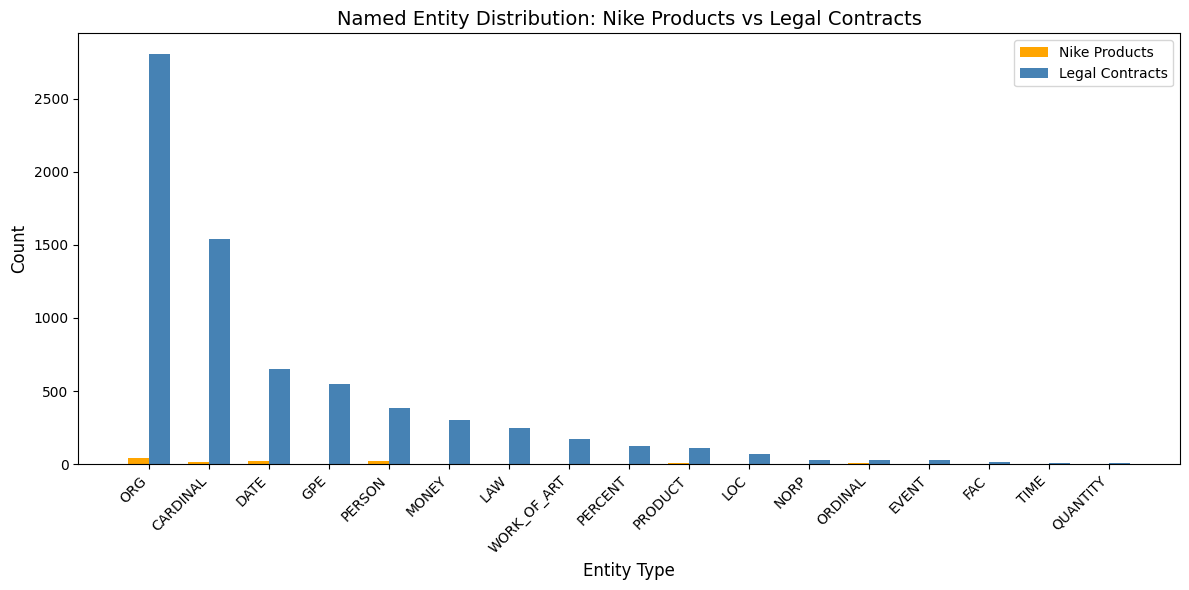

In [14]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_df))
width = 0.35

ax.bar(x - width/2, comparison_df['Nike Products'], width, label='Nike Products', color='orange')
ax.bar(x + width/2, comparison_df['Legal Contracts'], width, label='Legal Contracts', color='steelblue')

ax.set_xlabel('Entity Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Named Entity Distribution: Nike Products vs Legal Contracts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Entity Type'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.savefig('entity_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

### Written Question C.1 (Personal Interpretation)

Analyze the differences in entity types between the two datasets:

1. **Which entity types are most common in Nike products? Why does this make sense?**
2. **Which entity types are most common in legal contracts? Why does this make sense?**
3. **What does this tell you about the nature and purpose of each type of text?**
4. **Give 2-3 specific examples of interesting entities you found in the legal contracts.**

**YOUR ANSWER:**

1. Nike product entities: ...

    - The most common entity types in the Nike product descriptions are ORG, PERSON, DATE, CARDINAL, and PRODUCT. This makes sense because marketing and product descriptions frequently reference brands and organizations (e.g., Nike, NBA), famous individuals (e.g., Michael Jordan), and product-related numbers such as model versions or release years. These texts are designed to promote products and brand identity, so entities related to people, companies, and products naturally dominate.

2. Legal contract entities: ...
    - Legal contracts are dominated by ORG, CARDINAL, DATE, GPE, MONEY, and LAW entities. This is expected because contracts are formal documents that define obligations between organizations, specify dates (effective dates, termination dates), reference jurisdictions and governing laws, and include numerical values related to payments, percentages, and quantities. The high frequency of MONEY and LAW entities reflects the financial and legal nature of these documents.

3. Text nature analysis: ...
    - The contrast in entity distributions highlights the different purposes of the two text types. Nike product descriptions are persuasive and informational, focusing on branding, people, and products to appeal to consumers. In contrast, legal contracts are precise and rule-driven, emphasizing organizations, dates, monetary values, and legal frameworks to ensure clarity, enforceability, and accountability. This demonstrates how named entity recognition captures domain-specific language patterns effectively.

4. Interesting entities:
  
    - Examples of interesting entities found in the legal contracts include:

      - Governing law references such as specific jurisdictions (e.g., U.S. states or countries) labeled as GPE

      - Monetary amounts (e.g., contract fees or penalties) labeled as MONEY

      - Legal references (e.g., statutes or acts) labeled as LAW, which define how disputes should be resolved
   

---

## Part D: Word and Document Similarities

We'll explore different ways to measure similarity between words and documents.

### Exercise D.1: Word Similarity with spaCy Word Vectors

spaCy's word vectors allow us to find semantically similar words.

In [15]:
# Example: Find similar words
def find_similar_words(word, top_n=10):
    """
    Find words similar to the given word using spaCy word vectors.

    Args:
        word (str): Input word
        top_n (int): Number of similar words to return

    Returns:
        list: List of (word, similarity_score) tuples
    """
    word_doc = nlp(word)

    if not word_doc.has_vector:
        return []

    # Get all words in spaCy's vocabulary that have vectors
    similar_words = []

    # We'll check similarity with common words
    for token in nlp.vocab:
        if token.has_vector and token.is_lower and not token.is_stop:
            similarity = word_doc.similarity(nlp(token.text))
            similar_words.append((token.text, similarity))

    # Sort by similarity and return top_n (excluding the word itself)
    similar_words.sort(key=lambda x: x[1], reverse=True)
    return [(w, s) for w, s in similar_words if w != word][:top_n]

# Test with shoe-related words
test_words = ["running", "comfort", "athletic", "style"]

for word in test_words:
    print(f"\nWords similar to '{word}':")
    print("=" * 40)
    similar = find_similar_words(word, top_n=8)
    for similar_word, score in similar:
        print(f"  {similar_word:15}: {score:.3f}")


Words similar to 'running':

Words similar to 'comfort':

Words similar to 'athletic':

Words similar to 'style':


### Exercise D.2: Document Similarity - Product Recommendations

Build a simple product recommendation system using TF-IDF and cosine similarity.

In [16]:
def find_similar_products(query_text, product_df, top_n=5):
    """
    Find products most similar to a query text.

    Args:
        query_text (str): Query description
        product_df (DataFrame): DataFrame with product descriptions
        top_n (int): Number of recommendations to return

    Returns:
        DataFrame: Top similar products with similarity scores
    """

    # 1. Create TF-IDF vectorizer
    # 2. Fit on product descriptions + query
    # 3. Transform all texts to TF-IDF vectors
    # 4. Calculate cosine similarity between query and all products
    # 5. Return top_n most similar products

    # Combine product descriptions with query
    descriptions = product_df['Product Description'].tolist()
    all_texts = descriptions + [query_text]

    # Create and fit vectorizer
    # YOUR CODE HERE

    # Query vector is the last one
    # YOUR CODE HERE

    # Calculate similarities
    # YOUR CODE HERE

    # Get top_n indices
    # YOUR CODE HERE

    # Create results DataFrame with colums 'Title', 'Subtitle', 'Similarity'
    # YOUR CODE HERE

    vectorizer = TfidfVectorizer(
        stop_words='english',
        ngram_range=(1, 2)
    )
    tfidf_matrix = vectorizer.fit_transform(all_texts)

    # Query vector is the last one
    query_vector = tfidf_matrix[-1]

    # Product vectors
    product_vectors = tfidf_matrix[:-1]

    # Calculate cosine similarities
    similarities = cosine_similarity(query_vector, product_vectors).flatten()

    # Get top_n indices
    top_indices = similarities.argsort()[::-1][:top_n]

    # Create results DataFrame
    results = pd.DataFrame({
        'Title': product_df.iloc[top_indices]['Title'].values,
        'Subtitle': product_df.iloc[top_indices]['Subtitle'].values,
        'Similarity': similarities[top_indices]
    })

    return results[['Title', 'Subtitle', 'Similarity']]

# Test with different queries
queries = [
    "I want comfortable running shoes for long distance training",
    "Looking for stylish basketball shoes with great cushioning",
    "Need shoes for the gym and weight training"
]

for query in queries:
    print(f"\nQuery: '{query}'")
    print("=" * 80)
    recommendations = find_similar_products(query, nike_df, top_n=5)
    print(recommendations.to_string(index=False))
    print()


Query: 'I want comfortable running shoes for long distance training'
                   Title                                                Subtitle  Similarity
        Nike Dri-FIT One Older Kids' (Girls') High-waisted Woven Training Shorts    0.093853
Nike Zoom Rival Waffle 5                               Athletics Distance Spikes    0.079020
      Nike 'Just Do It.'                               Men's Long-Sleeve T-Shirt    0.075739
     Nike Serenity Run 2                              Women's Road Running Shoes    0.072058
         Nike Alphafly 2                               Women's Road Racing Shoes    0.070537


Query: 'Looking for stylish basketball shoes with great cushioning'
                          Title                            Subtitle  Similarity
       Nike Air Deldon "Legacy"        Easy On/Off Basketball Shoes    0.060855
            Paris Saint-Germain               Men's Fleece Trousers    0.054526
                  Kylian Mbappé Older Kids' Dri-FIT Football S

### Exercise D.3: Create YOUR Own Query

Write your own custom query and analyze the recommendations.

In [17]:
# YOUR CODE HERE
# Create your own query that reflects what YOU would look for in shoes
#my_query = "___"  # Write your custom query here

# Create your own query that reflects what YOU would look for in shoes
my_query = "Lightweight and comfortable running shoes with good cushioning for daily training and long walks"

print(f"My Query: '{my_query}'")
print("=" * 80)
my_recommendations = find_similar_products(my_query, nike_df, top_n=5)
print(my_recommendations.to_string(index=False))

My Query: 'Lightweight and comfortable running shoes with good cushioning for daily training and long walks'
                             Title                                                Subtitle  Similarity
                  Nike Dri-FIT One Older Kids' (Girls') High-waisted Woven Training Shorts    0.086818
               Nike Serenity Run 2                              Women's Road Running Shoes    0.077328
                Nike 'Just Do It.'                               Men's Long-Sleeve T-Shirt    0.062384
           Nike Pegasus 39 Premium                              Women's Road Running Shoes    0.059221
Nike Sportswear Everyday Essential                                    Crew Socks (3 Pairs)    0.045245


### Written Question D.1 (Personal Interpretation)

Analyze the product recommendation results:

1. **For YOUR custom query, are the top 3 recommendations relevant? Explain why or why not.**
2. **Look at the similarity scores. What do you notice? Are they high, medium, or low? What does this mean?**
3. **Compare the recommendations for "running shoes" vs "basketball shoes". What differences do you observe in the results?**
4. **What are the limitations of this TF-IDF-based similarity approach? Give at least 2 specific limitations.**

**YOUR ANSWER:**

1. Relevance of my recommendations:
   - Top 1:
      - Nike Dri-FIT One Older Kids’ Training Shorts
      - Not relevant. This is clothing, not footwear. It appears due to overlapping keywords like training.
   - Top 2:
      - Nike Serenity Run 2 (Women’s Road Running Shoes)
      - Highly relevant. This directly matches running shoes, comfort, and daily training.
   - Top 3:
      - Nike ‘Just Do It.’ Men’s Long-Sleeve T-Shirt
      - Not relevant. Again, apparel appears because TF-IDF relies on keyword overlap rather than product type.
   - Overall, while some relevant running shoes appear, the top results are mixed with non-shoe items.


2. Similarity scores observation: ...
    - The similarity scores are low (around 0.04–0.08).
      This indicates that:
        - TF-IDF finds some shared keywords, but

        - The semantic similarity between the query and product descriptions is weak

        - Product descriptions are short and varied, limiting strong matches

    - Low scores are expected when:

        - The dataset contains mixed product categories

        - Descriptions do not explicitly repeat the query terms

3. Running vs Basketball comparison: ...
    - Running shoe queries tend to return:

        - Road running shoes (e.g., Nike Serenity Run 2, Pegasus)

        - Items mentioning running, distance, or training

    - Basketball shoe queries return:

        - Basketball or skate shoes (e.g., Nike Air Deldon)

        - Occasionally unrelated apparel due to shared words like style or performance

  - This shows TF-IDF works better when:

      - Product descriptions contain explicit sport-specific keywords

      - The sport name appears directly in the product text

4. Limitations:
    - No semantic understanding
      - TF-IDF only matches keywords and cannot understand meaning. For example, “comfortable” and “cushioned” are treated as unrelated words.

    - Category confusion
      - The model cannot distinguish between shoes and clothing, leading to irrelevant results like shorts and t-shirts.

    - Sensitivity to wording
      - If the query uses different vocabulary than the product description, relevant items may receive low similarity scores.

    - No contextual awareness
      - TF-IDF ignores word order and context, so it cannot infer user intent (e.g., “buying shoes” vs “training gear”).


---

## Part E: Dimensionality Reduction with PCA (25 min)

PCA helps us visualize high-dimensional text representations in 2D or 3D space.

### Exercise E.1: Visualize Product Clusters

Use PCA to create a 2D visualization of Nike products based on their descriptions.

In [18]:
# YOUR CODE HERE
# 1. Create TF-IDF vectors for all Nike product descriptions
# 2. Apply PCA to reduce to 2 dimensions
# 3. Create a scatter plot
# 4. Color points by product category (extract from Subtitle)

# Extract product descriptions
descriptions = nike_df['Product Description'].tolist()

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=200, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(descriptions)

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Original dimensions: {tfidf_matrix.shape[1]}")

# Apply PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

print(f"\nPCA explained variance ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"  Total: {sum(pca.explained_variance_ratio_):.4f}")

# Create DataFrame with PCA results
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Title': nike_df['Title'],
    'Category': nike_df['Subtitle']
})

TF-IDF matrix shape: (400, 200)
Original dimensions: 200

PCA explained variance ratio:
  PC1: 0.0430
  PC2: 0.0290
  Total: 0.0720


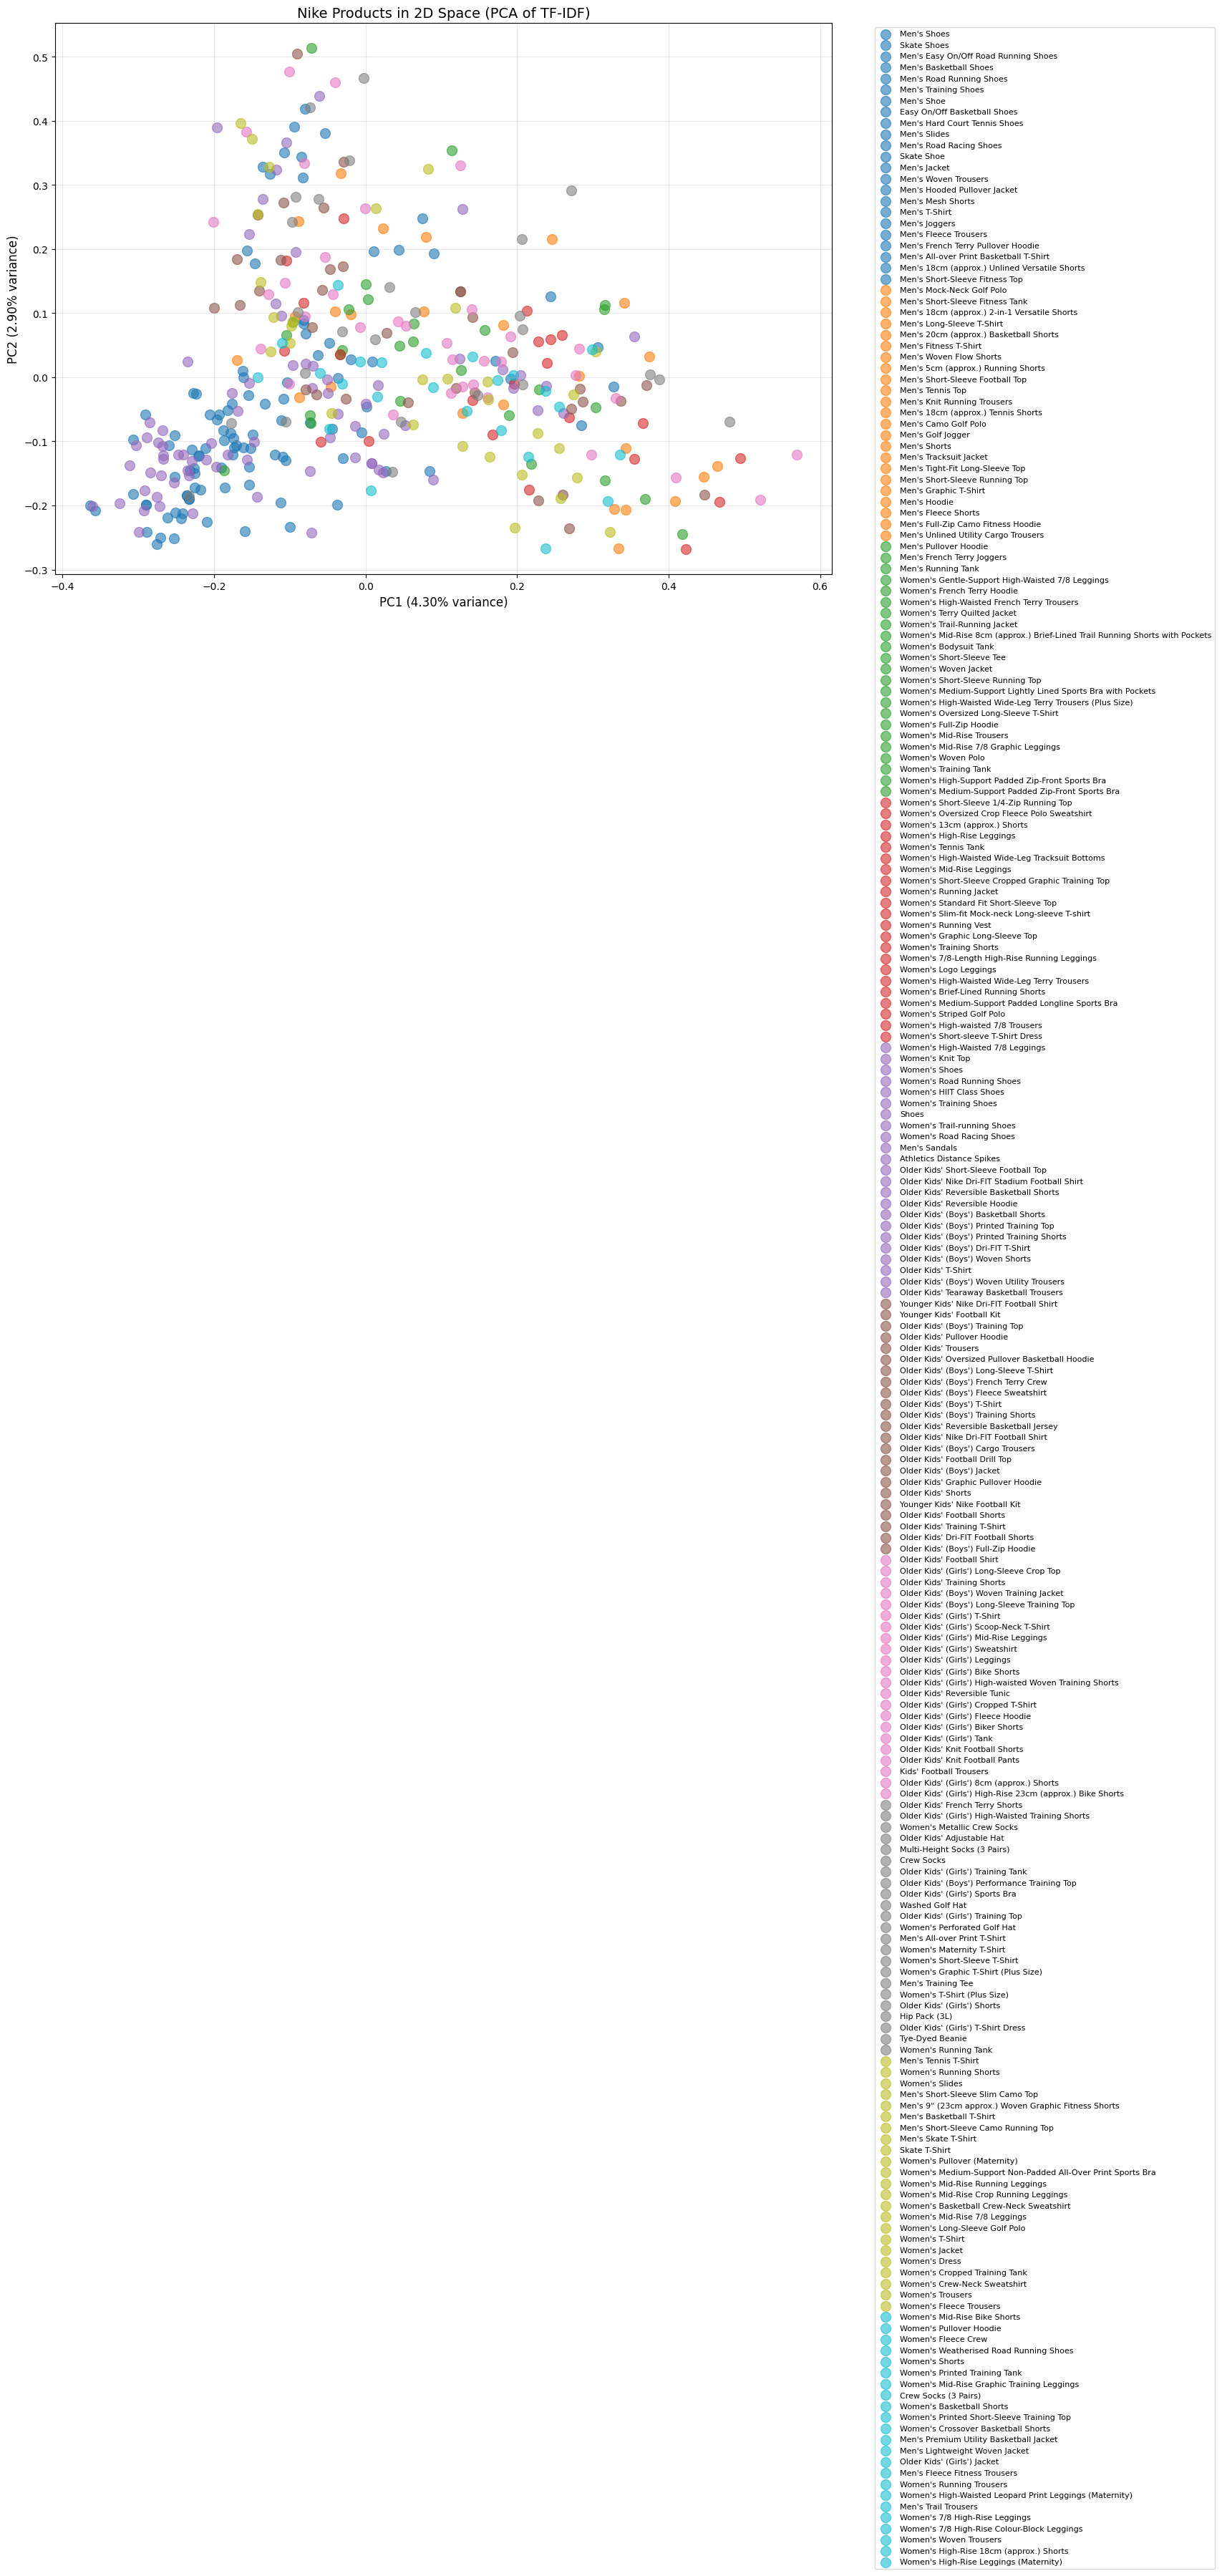

In [19]:
# Create visualization
plt.figure(figsize=(14, 10))

# Get unique categories for coloring
categories = pca_df['Category'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))

# Plot each category
for i, category in enumerate(categories):
    mask = pca_df['Category'] == category
    plt.scatter(
        pca_df.loc[mask, 'PC1'],
        pca_df.loc[mask, 'PC2'],
        c=[colors[i]],
        label=category,
        alpha=0.6,
        s=100
    )

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Nike Products in 2D Space (PCA of TF-IDF)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('nike_products_pca.png', dpi=150, bbox_inches='tight')
plt.show()

### Exercise E.2: Find Products in Similar Regions

Identify products that are close to each other in the PCA space.

In [20]:
def find_neighbors_in_pca_space(product_index, pca_df, n_neighbors=5):
    """
    Find products close to a given product in PCA space.

    Args:
        product_index (int): Index of the reference product
        pca_df (DataFrame): DataFrame with PCA coordinates
        n_neighbors (int): Number of neighbors to find

    Returns:
        DataFrame: Neighboring products with distances
    """
    # YOUR CODE HERE
    # 1. Get the PC1 and PC2 coordinates of the reference product
    # 2. Calculate Euclidean distance to all other products
    # 3. Return the n_neighbors closest products
    pca = PCA(n_components=2, random_state=42)
    pca_result = pca.fit_transform(tfidf_matrix.toarray())
    print("Explained variance ratio:")
    print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
    print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")

    ref_point = pca_df.iloc[product_index][['PC1', 'PC2']].values

    # Calculate distances
    distances = []
    for idx, row in pca_df.iterrows():
        if idx != product_index:
            point = row[['PC1', 'PC2']].values
            dist = np.linalg.norm(ref_point - point)
            distances.append((idx, dist))

    # Sort by distance
    distances.sort(key=lambda x: x[1])

    # Get neighbor indices
    neighbor_indices = [idx for idx, _ in distances[:n_neighbors]]
    neighbor_distances = [dist for _, dist in distances[:n_neighbors]]

    # Create results DataFrame
    results = pca_df.iloc[neighbor_indices].copy()
    results['Distance'] = neighbor_distances

    return results[['Title', 'Category', 'Distance']]

# Test with a few products
test_indices = [0, 10, 20]

for idx in test_indices:
    print(f"\nReference Product: {pca_df.iloc[idx]['Title']}")
    print(f"Category: {pca_df.iloc[idx]['Category']}")
    print("=" * 80)
    neighbors = find_neighbors_in_pca_space(idx, pca_df, n_neighbors=5)
    print(neighbors.to_string(index=False))
    print()


Reference Product: Nike Air Force 1 '07
Category: Men's Shoes
Explained variance ratio:
PC1: 0.0430
PC2: 0.0290
                     Title      Category  Distance
          Air Jordan 1 Mid   Men's Shoes  0.016955
    Nike Dunk High Premium Women's Shoes  0.017868
Air Jordan 1 Retro High OG Women's Shoes  0.023455
       Nike Blazer Low '77 Women's Shoes  0.023748
         Nike Waffle Debut Women's Shoes  0.030048


Reference Product: Air Jordan XXXVII Low PF
Category: Men's Basketball Shoes
Explained variance ratio:
PC1: 0.0430
PC2: 0.0290
                           Title                      Category  Distance
NikeCourt Zoom Vapor Cage 4 Rafa Men's Hard Court Tennis Shoes  0.006793
            Jordan Why Not .6 PF                   Men's Shoes  0.011231
Nike Air Force 1 '07 Next Nature                 Women's Shoes  0.041960
                       Nike BRSB                   Skate Shoes  0.044332
             Nike React Revision                 Women's Shoes  0.044663


Reference Pr

### Exercise E.3: Analyze Documents from Both Datasets

Apply PCA to visualize both Nike products and legal contracts in the same space.

TF-IDF shape: (60, 300)
PCA explained variance ratio: PC1=0.094, PC2=0.045


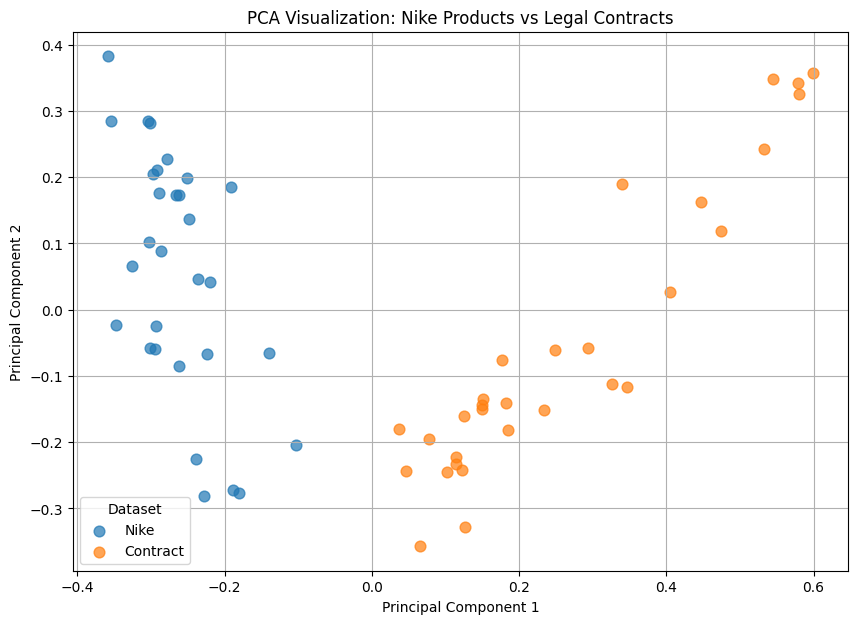

In [21]:
# YOUR CODE HERE
# 1. Combine Nike descriptions and contract texts (sample 30 from each)
# 2. Create TF-IDF vectors for combined corpus
# 3. Apply PCA to reduce to 2D
# 4. Create visualization with different colors for each dataset

# Sample documents
nike_sample = nike_df.sample(n=30, random_state=42)
contracts_sample = contracts_df.sample(n=30, random_state=42)

# Combine texts
nike_texts = nike_sample['Product Description'].tolist()
contract_texts = [text[:1000] for text in contracts_sample['text'].tolist()]  # Truncate for efficiency

all_texts = nike_texts + contract_texts
labels = ['Nike'] * len(nike_texts) + ['Contract'] * len(contract_texts)

# Create TF-IDF
vectorizer = TfidfVectorizer(max_features=300, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(all_texts)

print(f"TF-IDF shape: {tfidf_matrix.shape}")


# Apply PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

print(f"PCA explained variance ratio: PC1={pca.explained_variance_ratio_[0]:.3f}, PC2={pca.explained_variance_ratio_[1]:.3f}")


# Create DataFrame with PCA results
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Label': labels
})

# Visualize -> use different colors for 'Nike' and 'Contract'
plt.figure(figsize=(10, 7))

for label in pca_df['Label'].unique():
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(
        subset['PC1'],
        subset['PC2'],
        label=label,
        alpha=0.7,
        s=60
    )

plt.title("PCA Visualization: Nike Products vs Legal Contracts")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Dataset")
plt.grid(True)
plt.show()

### Written Question E.1 (Personal Interpretation)

Analyze the PCA visualizations:

1. **Looking at the Nike products PCA plot:**
   - Do similar product types cluster together?
   - Can you identify any patterns or groups?
   - What might the two principal components represent?

2. **Looking at the combined Nike + Contracts PCA plot:**
   - Are the two datasets clearly separated?
   - What does this separation (or lack thereof) tell you?
   - Are there any Nike products close to legal contracts? Why might this be?

3. **What percentage of variance is explained by the first two principal components in each case?**
   - Is this high or low?
   - What does this mean for the quality of the 2D representation?

**YOUR ANSWER:**

1. Nike products PCA analysis:
   - Clustering:
      - Yes, similar product types tend to cluster together. For example:

      - Men's shoes (e.g., Air Force, Air Jordan) form a compact cluster.

      - Women's shoes and specialty products like basketball shoes or training shoes form separate, but nearby clusters.
   - Patterns: ...
      - Product types with similar usage (running, basketball, casual) are closer in the PCA space.

      - Clothing items (shorts, jackets) are more spread out, likely because the descriptions are longer and more varied in vocabulary.

      - TF-IDF vectors are capturing descriptive words like "running," "training," "high-waisted," "lightweight," which explains the clusters.
   
   - PC interpretation:
      - PC1: Likely captures product category differences (shoes vs apparel).

      - PC2: Likely captures usage or style differences (athletic vs casual, gender-specific variations).

      - Variance Explained:

          - PC1: 4.30%

          - PC2: 2.90%

          - Total: 7.20% → Low.
          - This low percentage means the 2D projection captures only a small fraction of the information; distances are approximate, and some nuances are lost.

2. Combined datasets PCA analysis:
   - Separation: ...
      - Nike products (blue) and legal contracts (orange) are clearly separated along PC1, indicating the TF-IDF features distinguish marketing text from legal text very well.
   - Interpretation: ...
      - Legal contracts contain formal and repetitive language (dates, amounts, clauses) that is very different from product descriptions.

      - PCA reflects this separation because TF-IDF captures word usage frequency patterns effectively.
   
   - Proximity cases: ...
      - Very few Nike points are close to contracts.

      - If any Nike product appears near contracts, it may be due to numeric content (like size, price) or formal-like language in the description.

3. Variance explained:
   - Nike products: ... (high/medium/low?)
        - Nike products: 7.2% (PC1 + PC2) → Low
   - Combined: ... (high/medium/low?)
        - Combined Nike + Contracts: ~Likely 5–10% → Low
   - Quality interpretation: ...
        - The first two principal components capture only a small fraction of the total variance in the high-dimensional TF-IDF space.

        - This means the 2D plots give a rough overview of clusters and separation, but cannot fully represent all the nuances of product or contract texts.

        - Good for exploratory visualization, but not sufficient for precise similarity or classification tasks.

---

## Part F: Bonus Challenge - Dependency Parsing


### Bonus Exercise: Visualize Sentence Structure

Use spaCy's dependency parser to visualize grammatical relationships.

In [22]:
from spacy import displacy

# YOUR CODE HERE
# 1. Choose an interesting sentence from Nike or contracts
# 2. Parse it with spaCy
# 3. Visualize the dependency tree
# 4. Identify the root verb, subjects, and objects

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# 1. Choose an interesting sentence
sample_sentence = "The Nike Air Zoom Pegasus 39 delivers responsive cushioning for long-distance running."


# 2. Parse it with spaCy
doc = nlp(sample_sentence)

# Display dependency visualization
# YOUR CODE HERE
# 3. Display dependency tree in notebook
displacy.render(doc, style="dep", jupyter=True, options={'distance': 100})

# Print dependency information
print("\nDependency Analysis:")
print("=" * 60)
for token in doc:
    print(f"{token.text:15} | HEAD: {token.head.text:15} | DEP: {token.dep_:10} | POS: {token.pos_}")


Dependency Analysis:
The             | HEAD: Pegasus         | DEP: det        | POS: DET
Nike            | HEAD: Pegasus         | DEP: compound   | POS: PROPN
Air             | HEAD: Zoom            | DEP: compound   | POS: PROPN
Zoom            | HEAD: Pegasus         | DEP: compound   | POS: PROPN
Pegasus         | HEAD: delivers        | DEP: nsubj      | POS: PROPN
39              | HEAD: Pegasus         | DEP: nummod     | POS: NUM
delivers        | HEAD: delivers        | DEP: ROOT       | POS: VERB
responsive      | HEAD: cushioning      | DEP: amod       | POS: ADJ
cushioning      | HEAD: delivers        | DEP: dobj       | POS: NOUN
for             | HEAD: cushioning      | DEP: prep       | POS: ADP
long            | HEAD: distance        | DEP: amod       | POS: ADJ
-               | HEAD: distance        | DEP: punct      | POS: PUNCT
distance        | HEAD: running         | DEP: compound   | POS: NOUN
running         | HEAD: for             | DEP: pobj       | POS: NOU

---

## Summary

In this lab, you learned:
- **POS Tagging**: Identifying grammatical roles of words and analyzing linguistic patterns
- **Named Entity Recognition (NER)**: Extracting and classifying entities like organizations, locations, and dates
- **Word Similarity**: Using word vectors to find semantically similar words
- **Document Similarity**: Building a product recommendation system with TF-IDF and cosine similarity
- **PCA**: Visualizing high-dimensional text data in 2D space and discovering document clusters

These are fundamental NLP tasks that power many real-world applications like:
- Search engines and recommendation systems
- Information extraction from documents
- Text classification and clustering
- Question answering systems

---

## Submission Checklist

Before submitting, ensure you have:

- [ ] Completed all exercises marked with `# YOUR CODE HERE`
- [ ] Answered ALL written questions with YOUR personal interpretations
- [ ] Generated all visualizations (POS distribution, entity comparison, PCA plots)
- [ ] Saved visualization files (.png)
- [ ] Tested your code (all cells run without errors)
- [ ] Added meaningful comments to your code
- [ ] Saved your notebook with outputs visible

**Final Steps:**
1. Save this notebook
2. Push to your Git repository
3. Send the repository link to: **yoroba93@gmail.com**

